In [1]:
from google.colab import drive
import cv2
from google.colab.patches import cv2_imshow
import numpy as np
import matplotlib.pyplot as plt

In [2]:
drive.mount('/content/gdrive')

Mounted at /content/gdrive


(256, 256)


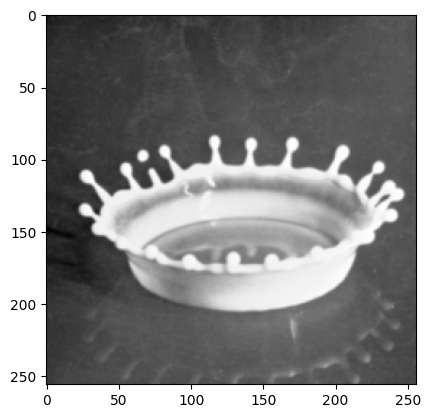

In [3]:
img = cv2.imread('/content/gdrive/My Drive/Images/milkdrop.bmp')
RGB_img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
gImg1 = cv2.cvtColor(RGB_img, cv2.COLOR_RGB2GRAY)
print(gImg1.shape)
plt.imshow(gImg1, cmap='gray')

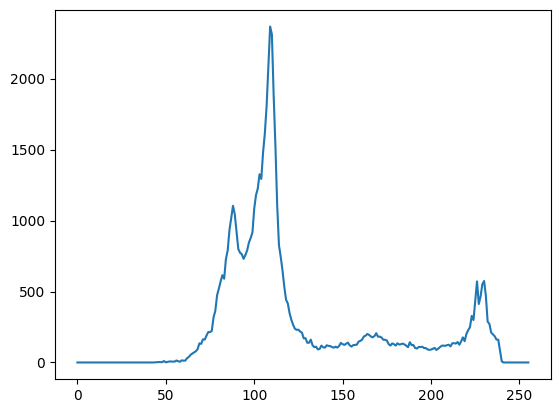

In [4]:
hist = cv2.calcHist([gImg1], [0], None, [256], [0, 255])
plt.plot(hist)


In [5]:
gBin = np.zeros((gImg1.shape[0], gImg1.shape[1]))

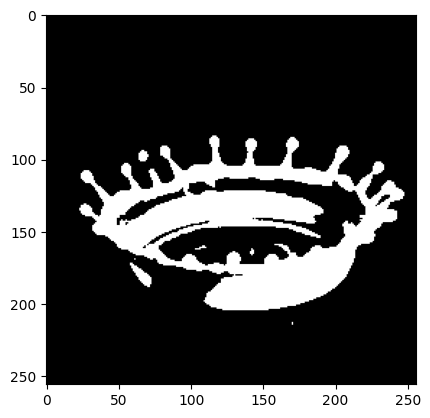

In [6]:
T =180

for h in range(gImg1.shape[0]):
	for w in range(gImg1.shape[1]):
		if(gImg1[h,w] > T):
			gBin[h,w] = 255
		else:
			gBin[h,w] = 0

plt.imshow(gBin, cmap = 'gray')
#cv2_imshow(gBin)

In [7]:
T1 = 50
T2 = 0
T0 = 1
outImg = np.zeros((gImg1.shape[0], gImg1.shape[1]))

In [15]:
def threshold_update(img, output, T1):
	sum1 = 0
	count1 = 1
	sum2 = 0
	count2= 1

	for h in range(img.shape[0]):
		for w in range(img.shape[1]):
			if(output[h,w] == 255):
				sum1 = sum1 + img[h,w]
				count1 = count1 + 1
			else:
				sum2 = sum2 + img[h,w]
				count2 = count2 + 1

In [9]:
for h in range(gImg1.shape[0]):
	for w in range(gImg1.shape[1]):
		if(gImg1[h,w] > T1):
			outImg[h,w] =255
		else:
			outImg[h,w] = 0

In [21]:
while True:
	T2 = threshold_update(gImg1, outImg, T1)

	if(np.abs(T2 - T1) < T0):
		for h in range(gImg1.shape[0]):
			for w in range(gImg1.shape[1]):
				if(gImg1[h,w] > T2):
					outImg[h,w] = 255
				else:
					outImg[h,w] = 0
	break;
else:
	T1 = T2
	for h in range(gImg1.shape[0]):
		for w in range(gImg1.shape[1]):
			if(gIMg1[h,w] > T2):
				outImg[h,w] = 255
			else:
				outImg[h,w] = 0

TypeError: unsupported operand type(s) for -: 'NoneType' and 'int'